<a href="https://colab.research.google.com/github/AlienX77-cmd/Computational-Finance/blob/main/Computational_Finance_Homework_4_Portfolio_Optimization_Programing_6310505688_Kittipak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
# Kittipak Wibulsthien 6310505688
# กิตติภัค วิบูลเสถียร 6310505688

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import yfinance as yf
import time

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['cla']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# **1) Write a program to read stock data of 5 companies in US market. You can use stocks in SET as well. However, SET closed prices are not adjusted. Thus, the result may not reflect the actual market condition.**

In [220]:
# 1. General Dynamics Corporation (GD)

'''
General Dynamics Corporation is an American publicly traded aerospace and defense corporation headquartered in Reston, Virginia.
As of 2020, it was the fifth-largest defense contractor in the world by arms sales, and fifth largest in the United States by total sales.
'''

df_GD = yf.download("GD")
df_GD.fillna(method='bfill', inplace=True)
df_GD.tail(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-22,221.059998,221.669998,218.309998,218.339996,218.339996,921800
2023-09-25,217.710007,219.550003,217.179993,219.330002,219.330002,648700
2023-09-26,218.639999,220.009995,218.080002,218.179993,218.179993,889700
2023-09-27,219.330002,221.050003,218.919998,221.000000,221.000000,666800
2023-09-28,222.059998,224.095001,222.080002,222.449997,222.449997,338158


In [221]:
df_GD.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.0,0.753125,0.728125,0.746875,0.177694,2648000
1962-01-03,0.0,0.781250,0.753125,0.771875,0.183642,2092000
1962-01-04,0.0,0.806250,0.771875,0.775000,0.184386,2884000
1962-01-05,0.0,0.793750,0.775000,0.778125,0.185129,1532000
1962-01-08,0.0,0.793750,0.765625,0.790625,0.188103,1676000


In [222]:
# 2. McDonald's Corporation (MCD)

'''
McDonald's Corporation is an American multinational fast food chain,
founded in 1940 as a restaurant operated by Richard and Maurice McDonald,
in San Bernardino, California, United States.
'''

df_MCD = yf.download("MCD")
df_MCD.fillna(method='bfill', inplace=True)
df_MCD.tail(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-22,271.399994,273.640015,270.829987,272.220001,272.220001,1958300
2023-09-25,270.450012,271.760010,268.910004,269.779999,269.779999,1895500
2023-09-26,268.820007,269.299988,266.579987,267.720001,267.720001,2251600
2023-09-27,267.720001,267.940002,262.290009,263.640015,263.640015,2735000
2023-09-28,264.230011,266.304993,263.136993,265.399994,265.399994,1048431


In [223]:
df_MCD.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1966-07-05,0.0,0.273663,0.267490,0.269547,0.118799,388800
1966-07-06,0.0,0.283951,0.267490,0.283951,0.125148,692550
1966-07-07,0.0,0.291152,0.271605,0.273663,0.120613,1858950
1966-07-08,0.0,0.276749,0.267490,0.276749,0.121973,1239300
1966-07-11,0.0,0.283951,0.272634,0.275720,0.121520,656100


In [224]:
# 3. JPMorgan Chase & Co. (JPM)

'''
JPMorgan Chase & Co. is an American multinational financial services firm headquartered in New York City and incorporated in Delaware.
It is the largest bank in the United States and the world's largest bank by market capitalization as of 2023.
'''

df_JPM = yf.download("JPM")
df_JPM.fillna(method='bfill', inplace=True)
df_JPM.tail(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-22,147.289993,147.509995,145.190002,145.729996,145.729996,7071700
2023-09-25,145.350006,146.520004,143.699997,146.449997,146.449997,7044700
2023-09-26,144.600006,145.839996,144.229996,144.929993,144.929993,7468400
2023-09-27,145.190002,146.089996,144.509995,145.779999,145.779999,6716900
2023-09-28,146.279999,148.869995,146.027298,147.380005,147.380005,4507687


In [225]:
df_JPM.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.0,5.129630,5.018519,5.037037,1.098447,62775
1980-03-18,0.0,5.111111,5.037037,5.074074,1.106524,64125
1980-03-19,0.0,5.166667,5.111111,5.148148,1.122677,40500
1980-03-20,0.0,5.148148,5.092593,5.111111,1.114601,18900
1980-03-21,0.0,5.222222,5.111111,5.222222,1.138831,97200


In [226]:
# 4. Merck & Co., Inc. (MRK)

'''
Merck & Co., Inc. is an American multinational pharmaceutical company headquartered in Rahway, New Jersey,
and is named for Merck Group, founded in Germany in 1668, of whom it was once the American arm.
The company does business as Merck Sharp & Dohme or MSD outside the United States and Canada.
'''

df_MRK = yf.download("MRK")
df_MRK.fillna(method='bfill', inplace=True)
df_MRK.tail(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-21,107.269997,107.879997,106.419998,106.730003,106.730003,5856600
2023-09-22,107.220001,107.220001,105.959999,106.339996,106.339996,5027200
2023-09-25,106.050003,106.190002,105.110001,105.839996,105.839996,6052200
2023-09-26,105.120003,106.550003,105.110001,105.389999,105.389999,5400500
2023-09-27,105.449997,105.519997,103.300003,103.940002,103.940002,5635500


In [227]:
df_MRK.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.0,0.397030,0.393165,0.395374,0.068943,633830
1962-01-03,0.0,0.395374,0.375495,0.378808,0.066054,6564672
1962-01-04,0.0,0.382121,0.373286,0.374943,0.065380,1199750
1962-01-05,0.0,0.373286,0.360033,0.362242,0.063165,520646
1962-01-08,0.0,0.365555,0.361138,0.363346,0.063358,1380845


In [228]:
# 5. Microsoft Corporation (MSFT)

'''
Microsoft Corporation is an American multinational technology corporation headquartered in Redmond, Washington.
Microsoft's best-known software products are the Windows line of operating systems,
the Microsoft 365 suite of productivity applications, and the Edge web browser.
'''

df_MSFT = yf.download("MSFT")
df_MSFT.fillna(method='bfill', inplace=True)
df_MSFT.tail(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-22,321.320007,321.450012,316.149994,317.010010,317.010010,21429700
2023-09-25,316.589996,317.670013,315.000000,317.540009,317.540009,17836000
2023-09-26,315.130005,315.880005,310.019989,312.140015,312.140015,26297600
2023-09-27,312.299988,314.299988,309.690002,312.790009,312.790009,19387300
2023-09-28,310.989990,315.480011,309.450012,313.519989,313.519989,11547323


In [229]:
df_MSFT.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060396,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400


In [230]:
# All five tickers at once in one dataframe (only Adj Close)
tickers = ["GD", "MCD", "JPM", "MRK", "MSFT"]

ohlc = yf.download(tickers, period="max")

adj_prices = ohlc["Adj Close"].dropna()
adj_prices.tail()

[*********************100%%**********************]  5 of 5 completed


,GD,JPM,MCD,MRK,MSFT
Date,,,,,
2023-09-22,218.339996,145.729996,272.220001,106.339996,317.010010
2023-09-25,219.330002,146.449997,269.779999,105.839996,317.540009
2023-09-26,218.179993,144.929993,267.720001,105.389999,312.140015
2023-09-27,221.000000,145.779999,263.640015,103.940002,312.790009
2023-09-28,222.449997,147.380005,265.399994,103.849998,313.519989


# **2) Perform portfolio optimization (finding weights) based on the following objective function.**

In [231]:
!pip install pandas numpy matplotlib yfinance PyPortfolioOpt
import os
if not os.path.isdir('data'):
    os.system('git clone https://github.com/robertmartin8/PyPortfolioOpt.git')
    os.chdir('PyPortfolioOpt/cookbook')

In [232]:
# Calculating the covariance matrix

import pypfopt
pypfopt.__version__

'1.5.5'

###**Calculating the covariance matrix**


In [233]:
from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(adj_prices, frequency=252)
sample_cov

,GD,JPM,MCD,MRK,MSFT
GD,0.066308,0.032790,0.018024,0.019706,0.024571
JPM,0.032790,0.134715,0.030880,0.032982,0.048451
MCD,0.018024,0.030880,0.059623,0.021247,0.026033
MRK,0.019706,0.032982,0.021247,0.069687,0.028189
MSFT,0.024571,0.048451,0.026033,0.028189,0.113829


<Axes: >

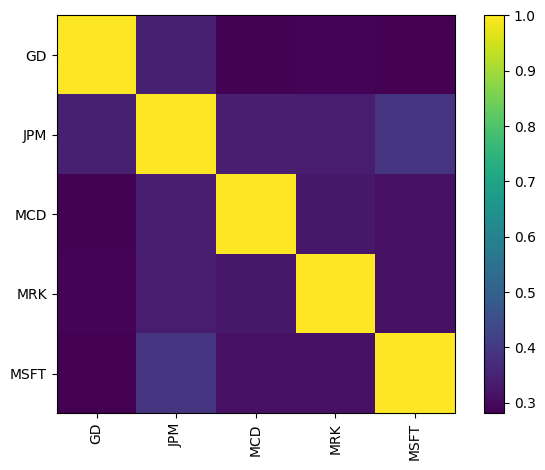

In [234]:
S = risk_models.CovarianceShrinkage(adj_prices).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True)

###**Return estimation**

As discussed in the docs, it is often a bad idea to provide returns using a simple estimate like the mean of past returns. Unless you have a proprietary method for estimating returns, research suggests that you may be better off not providing expected returns – you can then just find the min_volatility() portfolio or use HRP.

However, in this example we will use the CAPM returns, which aims to be slightly more stable than the default mean historical return.

In [235]:
from pypfopt import expected_returns

mu = expected_returns.capm_return(adj_prices)
mu

GD      0.142088
JPM     0.231665
MCD     0.137859
MRK     0.149964
MSFT    0.202357
Name: mkt, dtype: float64

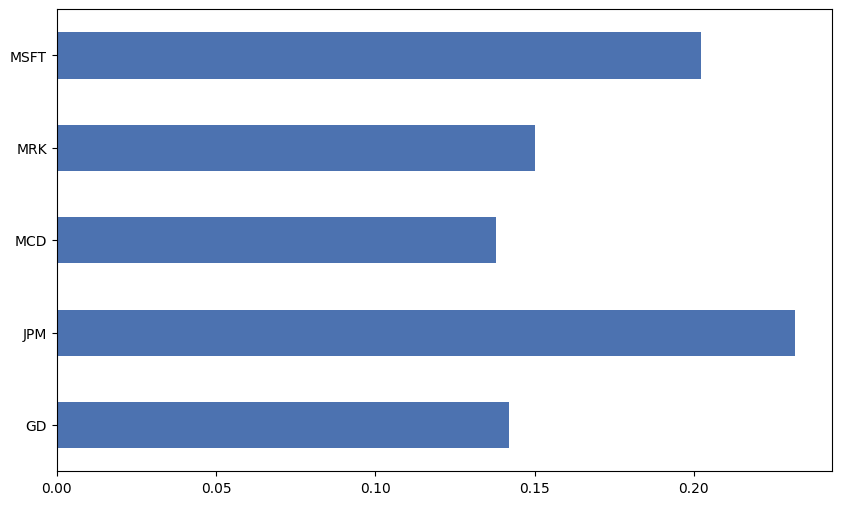

In [236]:
mu.plot.barh(figsize=(10,6));

##**Minimise risk for a given return**

We may instead be in the situation where we have a certain required rate of return, but would like to minimise risk.

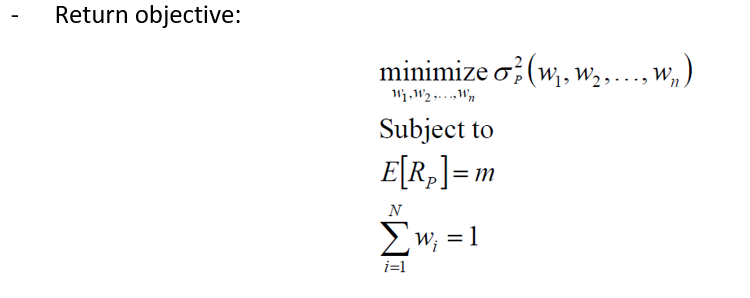

In [237]:
# Assume given return is m = 17% and we want to minimize the variance (risk)
# and also that we will invest all our money into the portfolio so that the sum of all the weights equal 100% or 1 (according to the second constraint)

from pypfopt import objective_functions
from pypfopt import EfficientFrontier

ef = EfficientFrontier(mu, S) # setup
ef.add_objective(objective_functions.L2_reg) # add a secondary objective

ef.efficient_return(target_return=0.20) # Minimize risk for the give return => Expected return = m = 17% (from the first constraint)

weights = ef.clean_weights()
weights

OrderedDict([('GD', 0.08097),
             ('JPM', 0.42748),
             ('MCD', 0.06366),
             ('MRK', 0.1126),
             ('MSFT', 0.31529)])

In [238]:
ef.portfolio_performance(verbose=True)

Expected annual return: 20.0%
Annual volatility: 25.0%
Sharpe Ratio: 0.72


(0.20000000000000007, 0.2501756608726443, 0.7194944519068615)

/usr/local/lib/python3.10/dist-packages/pypfopt/plotting.py:190: UserWarning: Could not construct portfolio for parameter value 0.234
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pypfopt/plotting.py:190: UserWarning: Could not construct portfolio for parameter value 0.240
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pypfopt/plotting.py:190: UserWarning: Could not construct portfolio for parameter value 0.246
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pypfopt/plotting.py:190: UserWarning: Could not construct portfolio for parameter value 0.251
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pypfopt/plotting.py:190: UserWarning: Could not construct portfolio for parameter value 0.257
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pypfopt/plotting.py:190: UserWarning: Could not construct portfolio for parameter value 0.263
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pypfopt/plotting.py:190: UserWarning: Could not constr

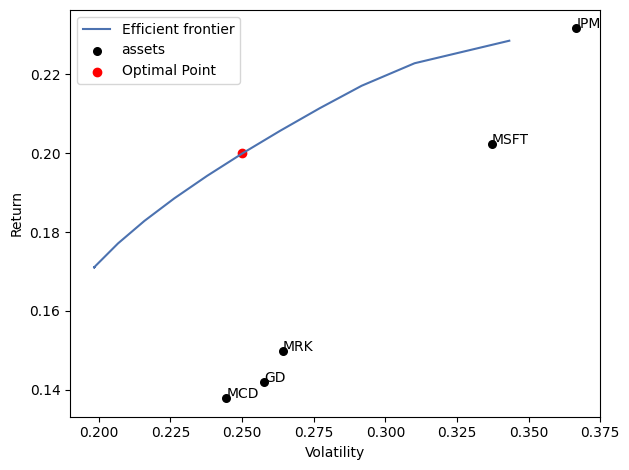

In [239]:
# Plot the efficient frontier and overlay the optimal point
ax = plotting.plot_efficient_frontier(ef, ef_param_range=np.linspace(0.12, 0.4, 50), show_tickers=True, showfig=False)

# Overlay the optimal point on the graph
ax.scatter(
    0.24986839381940049,  # Standard deviation (volatility)
    0.2,
    color="red",
    marker="o",
    label="Optimal Point",
)
ax.legend()

# Show the graph
plt.show()

<Axes: >

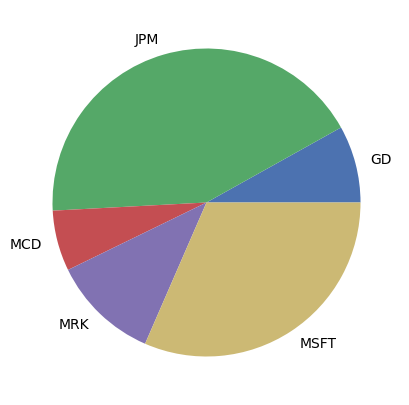

In [240]:
pd.Series(weights).plot.pie(figsize=(5, 5))

<Axes: >

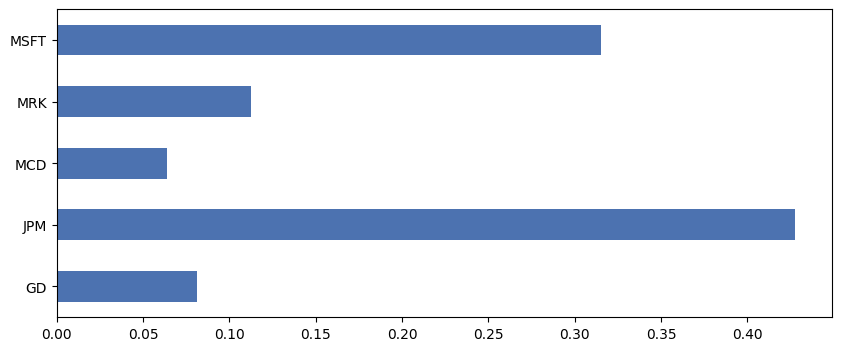

In [241]:
pd.Series(weights).plot.barh(figsize=(10,4))

In [242]:
# Net weight = 1

net_weight = sum(list(weights.values()))
print(f"Net weight: {net_weight:.2f}")

Net weight: 1.00


##**Maximise return for a given risk, with L2 regularisation**

Let's imagine that we've put a lot of thought into our risk tolerance, and have decided that we can't accept anything more than 25% volatility. We can use PyPortfolioOpt to construct a portfolio that maximises return for a given risk (with the same caveats about expected returns).

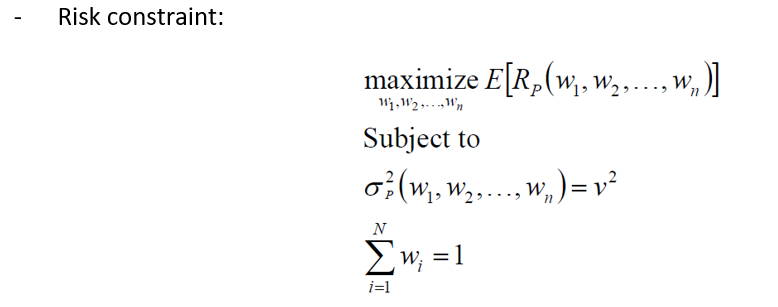

In [264]:
from pypfopt import objective_functions
from pypfopt import EfficientFrontier

ef2 = EfficientFrontier(mu, S)
ef2.add_objective(objective_functions.L2_reg) # add a secondary objective
ef2.efficient_risk(target_volatility=0.20)

weights2 = ef2.clean_weights()
weights2

OrderedDict([('GD', 0.20204),
             ('JPM', 0.19611),
             ('MCD', 0.20236),
             ('MRK', 0.20148),
             ('MSFT', 0.19801)])

In [265]:
ef2.portfolio_performance(verbose=True)

Expected annual return: 17.2%
Annual volatility: 20.0%
Sharpe Ratio: 0.76


(0.17231993441844778, 0.2000000001296941, 0.7615996715983641)

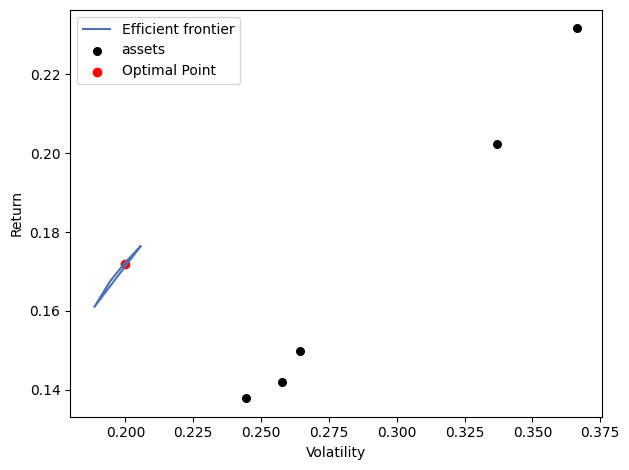

In [268]:
# Plot the efficient frontier and overlay the optimal point
ax2 = plotting.plot_efficient_frontier(ef2, ef_param="risk", ef_param_range=np.linspace(0.12, 0.4, 50), show_ticker=True, showfig=False)

# Overlay the optimal point on the graph
ax2.scatter(
    0.20,  # Standard deviation (volatility)
    0.172,
    color="red",
    marker="o",
    label="Optimal Point",
)
ax2.legend()

# Show the graph
plt.show()